In [1]:
# Import the warnings.

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the useful libraries.

import pandas as pd, numpy as np
import datetime as dt
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# <font color = Purple> Assignment: Uber Supply-Demand Gap </font>

In [3]:
# Read the data set of "Uber Request Data" in uber_df.

uber_df = pd.read_csv("Uber Request Data.csv")
uber_df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [4]:
# Checking the number of rows and columns in the dataframe

uber_df.shape

(6745, 6)

In [5]:
# Checking the column-wise info of the dataframe

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# Cheaking the null value in 'uber_df' dataframe 

uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
# Check the summary for the numeric columns 

uber_df.describe(include = "all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 9:40,12/7/2016 21:53
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


## Summary Of Inspecting The Dataframe

- 'Driver id' fields have decimal values however, it should be integer values
- 'Request timestamp' and 'Drop timestamp' fields have dates in different formats however, it should be in uniform format for analysis. Eg. '15-07-2016 10:00:43' vs. '11/7/2016 13:08'
- 'Driver id' fields and 'Drop timestamp' have many 'NaN' values

## Cleaning & Handling The Data

In [8]:
# formatting 'request timestamp' columns as uniform datetime format

uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"], dayfirst = True)
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [9]:
# formatting 'drop timestamp' columns as uniform datetime format

uber_df["Drop timestamp"] = pd.to_datetime(uber_df["Drop timestamp"], dayfirst = True)
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [10]:
# Checking the column-wise info of the dataframe

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [11]:
# Creating a derived column, "Request Date", "Request Time", "Request Hour" representing request date, time and hour of day

uber_df["Request Date"] = uber_df["Request timestamp"].dt.date
uber_df["Request Time"] = uber_df["Request timestamp"].dt.time
uber_df["Request Hour"] = uber_df["Request timestamp"].dt.hour
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8


In [12]:
# Creating a derived column, "Drop Date", "Drop Time" representing drop date and time of day

uber_df["Drop Date"] = uber_df["Drop timestamp"].dt.date
uber_df["Drop Time"] = uber_df["Drop timestamp"].dt.time
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47


In [13]:
# Creating a derived column, "Request Weekdays" representing day of week

uber_df["Request Weekdays"] = uber_df["Request timestamp"].apply(lambda x: dt.datetime.strftime(x, '%A'))
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,Wednesday


In [14]:
# Cheaking the null value in 'uber_df' dataframe 

uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request Date            0
Request Time            0
Request Hour            0
Drop Date            3914
Drop Time            3914
Request Weekdays        0
dtype: int64

## Note:

- The NaNs/missing values in the column "Driver_Id" can be ignored. This is because we see that since there were NO CARS AVAILABLE at point of the day after the user tried to book a cab, no driver was alloted the trip and hence the driver_id is empty.
- Similary, we can ignore the NaNs/missing values in the column "Drop timestamp" as for all of them, the trip is either CANCELLED or NO CARS AVAILABLE.
- In both the above cases, the data is missing due to a genuine reason and not that it got lost during data collection. Hence, I have not substitued them with any other values based on any logic.

In [15]:
# Creating a function to determine the ride slot on basis of 'Request timestamp'

def get_slot(rt):
    if rt in range(4,6):
        return 'Early Morning'
    if rt in range(6,12):
        return 'Morning'
    if rt in range(12,17):
        return 'Afternoon'
    if rt in range(17,20):
        return 'Evening'
    if rt in range(20,24):
        return 'Night'
    if rt in range(0,4):
        return 'Late Night'

uber_df['Time Slot'] = uber_df['Request timestamp'].dt.hour.apply(lambda x: get_slot(x))

# Checking if all rows have been assigned time slots i.e. we do not have null values

uber_df['Time Slot'].unique()

array(['Morning', 'Evening', 'Night', 'Early Morning', 'Afternoon',
       'Late Night'], dtype=object)

In [16]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,Tuesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,Wednesday,Morning


In [17]:
# Cheaking the value counts of "slot" column

uber_df["Time Slot"].value_counts()

Morning          2072
Night            1439
Evening          1401
Afternoon         810
Early Morning     648
Late Night        375
Name: Time Slot, dtype: int64

In [18]:
# Grouping 'uber_df' data by 'status' column and counting number of request ids for each status type

uber_df.groupby(uber_df.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,0,0,2650,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [19]:
# Checking whats the range of the date for which data is given to us

print("Maximum Date: ", max(uber_df['Request Date']))
print("Minimum Date: ", min(uber_df['Request Date']))

Maximum Date:  2016-07-15
Monimum Date:  2016-07-11


In [20]:
# All unique dates

print(uber_df['Request Date'].unique())

[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


In [21]:
# Grouping 'uber_df' data by 'driver id' & 'status' columns and storing it in a new dataframe
#'driverID_status_groupby' and printing top 10 rows

driverID_status_groupby = uber_df.groupby(["Driver id", "Status"]).count()
driverID_status_groupby.head(10)

Request id  Pickup point  Request timestamp  \
Driver id Status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop timestamp  Request Date  Request Time  \
Driver id Status                                                       
1.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
2.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
3.0       Cancelled                    0             4             4   
          Trip Completed              10            10            10   
4.0       Cancelled                    0             5             5   
          Trip Completed              10            10            10   
5.0       Cancelled                    0             2             2   
          Trip Completed              11            11            11   

                          Request Hour  Drop Date  Drop Time  \
Driver id Status                                               
1.0       Cancelled                  4          0          0   
          Trip Completed             9          9          9   
2.0       Cancelled                  4          0          0   
          Trip Completed             9          9          9   
3.0       Cancelled                  4          0          0   
          Trip Completed            10         10         10   
4.0       Cancelled                  5          0          0   
          Trip Completed            10         10         10   
5.0       Cancelled                  2          0          0   
          Trip Completed            11         11         11   

                          Request Weekdays  Time Slot  
Driver id Status                                       
1.0       Cancelled                      4          4  
          Trip Completed                 9          9  
2.0       Cancelled                      4          4  
          Trip Completed                 9          9  
3.0       Cancelled                      4          4  
          Trip Completed                10         10  
4.0       Cancelled                      5          5  
          Trip Completed                10         10  
5.0       Cancelled                      2          2  
          Trip Completed                11         11

In [22]:
# Filtering the "uber_df" dataframe for which trip is either cancelled or no cab was available and 
# storing it in a new dataframe "TripCancelled_or_NoCarsAvailable"

TripCancelled_or_NoCarsAvailable = uber_df[uber_df["Drop timestamp"].isnull()]
TripCancelled_or_NoCarsAvailable.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,6,NaT,NaT,Wednesday,Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,17,NaT,NaT,Thursday,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,20,NaT,NaT,Thursday,Night
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,10,NaT,NaT,Friday,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,19,NaT,NaT,Tuesday,Evening


In [23]:
# Grouping "TripCancelled_or_NoCarsAvailable" dataframe by status and printing count for each status type

TripCancelled_or_NoCarsAvailable.groupby(TripCancelled_or_NoCarsAvailable.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,0,0,2650,2650


In [24]:
# Filtering the "uber_df" dataframe for which trip was completed and storing it in a new dataframe "Trip_Completed"

Trip_Completed = uber_df[-uber_df["Drop timestamp"].isnull()]
Trip_Completed.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,Tuesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,Wednesday,Morning


In [25]:
# Grouping "Trip_Completed" dataframe by status and printing count for each status type

Trip_Completed.groupby(Trip_Completed.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [26]:
# Filtering the "uber_df" dataframe for the requests for which no cars were available and 
# storing it in a new dataframe "No_Cars_Available"

No_Cars_Available = uber_df[uber_df["Driver id"].isnull()]
No_Cars_Available.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT,2016-07-11,00:02:00,0,NaT,NaT,Monday,Late Night
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT,2016-07-11,00:06:00,0,NaT,NaT,Monday,Late Night
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT,2016-07-11,00:09:00,0,NaT,NaT,Monday,Late Night
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,2016-07-11,00:23:00,0,NaT,NaT,Monday,Late Night
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT,2016-07-11,00:30:00,0,NaT,NaT,Monday,Late Night


In [27]:
# Grouping "No_Cars_Available" dataframe by status and printing count for each status type

No_Cars_Available.groupby(No_Cars_Available.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,0,0,2650,2650


In [28]:
# Filtering the "uber_df" dataframe for which 'driver id' was present, so either the trip was cancelled or completed 
# storing it in a new dataframe "driverId_was_present"

driverId_was_present = uber_df[-uber_df["Driver id"].isnull()]
driverId_was_present.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,Tuesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,Wednesday,Morning


In [29]:
# Grouping "driverId_was_present" dataframe by status and printing count for trip completed and cancelled

driverId_was_present.groupby(driverId_was_present.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0,0,1264,1264
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [30]:
# Filtering the "uber_df" dataframe for which 'driver id' was present but drop time was not, so the trip was cancelled
# storing it in a new dataframe "Trip_Was_Cnacelled"

Trip_Was_Cancelled = driverId_was_present[driverId_was_present["Drop timestamp"].isnull()]
Trip_Was_Cancelled.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,6,NaT,NaT,Wednesday,Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,17,NaT,NaT,Thursday,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,20,NaT,NaT,Thursday,Night
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,10,NaT,NaT,Friday,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,19,NaT,NaT,Tuesday,Evening


In [31]:
# Grouping "Trip_Was_Cnacelled" dataframe by status and printing count for each status type

Trip_Was_Cancelled.groupby(Trip_Was_Cancelled.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,0,0,1264,1264


In [32]:
# Grouping 'uber_df' data by 'Request Date' & 'Status' columns and storing it in a new dataframe
#'requestDate_Status_groupby' and printing top 10 rows

requestDate_Status_groupby = uber_df.groupby(["Request Date", "Status"]).count()
requestDate_Status_groupby.head(10)

Request id  Pickup point  Driver id  \
Request Date Status                                                   
2016-07-11   Cancelled                 262           262        262   
             No Cars Available         504           504          0   
             Trip Completed            601           601        601   
2016-07-12   Cancelled                 240           240        240   
             No Cars Available         505           505          0   
             Trip Completed            562           562        562   
2016-07-13   Cancelled                 270           270        270   
             No Cars Available         490           490          0   
             Trip Completed            577           577        577   
2016-07-14   Cancelled                 252           252        252   

                                Request timestamp  Drop timestamp  \
Request Date Status                                                 
2016-07-11   Cancelled                        262               0   
             No Cars Available                504               0   
             Trip Completed                   601             601   
2016-07-12   Cancelled                        240               0   
             No Cars Available                505               0   
             Trip Completed                   562             562   
2016-07-13   Cancelled                        270               0   
             No Cars Available                490               0   
             Trip Completed                   577             577   
2016-07-14   Cancelled                        252               0   

                                Request Time  Request Hour  Drop Date  \
Request Date Status                                                     
2016-07-11   Cancelled                   262           262          0   
             No Cars Available           504           504          0   
             Trip Completed              601           601        601   
2016-07-12   Cancelled                   240           240          0   
             No Cars Available           505           505          0   
             Trip Completed              562           562        562   
2016-07-13   Cancelled                   270           270          0   
             No Cars Available           490           490          0   
             Trip Completed              577           577        577   
2016-07-14   Cancelled                   252           252          0   

                                Drop Time  Request Weekdays  Time Slot  
Request Date Status                                                     
2016-07-11   Cancelled                  0               262        262  
             No Cars Available          0               504        504  
             Trip Completed           601               601        601  
2016-07-12   Cancelled                  0               240        240  
             No Cars Available          0               505        505  
             Trip Completed           562               562        562  
2016-07-13   Cancelled                  0               270        270  
             No Cars Available          0               490        490  
             Trip Completed           577               577        577  
2016-07-14   Cancelled                  0               252        252

In [33]:
# Grouping 'uber_df' data by 'Request Date' columns for overall count and storing it in a new dataframe 'requestDate_groupby' 

requestDate =  uber_df.groupby(["Request Date"]).count()
requestDate.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
Request Date,,,,,,,,,,,,
2016-07-11,1367,1367,863,1367,1367,601,1367,1367,601,601,1367,1367
2016-07-12,1307,1307,802,1307,1307,562,1307,1307,562,562,1307,1307
2016-07-13,1337,1337,847,1337,1337,577,1337,1337,577,577,1337,1337
2016-07-14,1353,1353,782,1353,1353,530,1353,1353,530,530,1353,1353
2016-07-15,1381,1381,801,1381,1381,561,1381,1381,561,561,1381,1381


## Visualizing Data

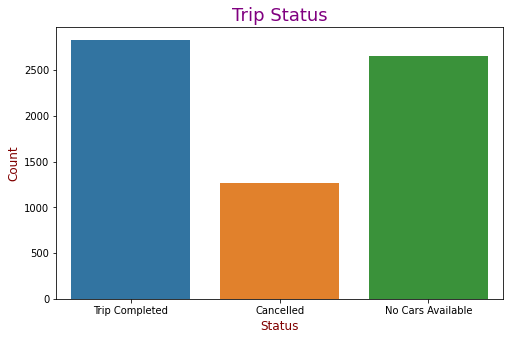

In [34]:
# Plotting graph for trip status
plt.figure(figsize = [8,5])

sns.countplot(uber_df['Status'])

# Setting title
plt.title('Trip Status', fontsize = 18, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Status', fontdict = {'fontsize' : 12, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 8, 'color' : 'Maroon'})

plt.show()

**`Inferences:`**
- Total Demand = 6745
- Total Supply = 2831
- Supply-Demand Gap = 3914
- This shows only 42% of total demand was met there is gap of 58% of supply due to trip cancellation or cabs availability.

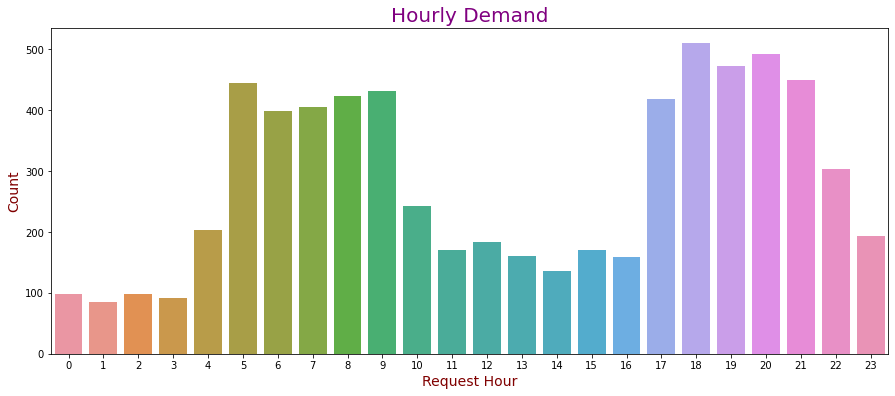

In [35]:
# Plotting data to show hourly distribution of request
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(uber_df['Request Hour'])

# Setting title
plt.title('Hourly Demand', fontsize = 20, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel("Request Hour", fontdict = {'fontsize' : 14, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel("Count", fontdict = {'fontsize' : 14, 'fontweight' : 8, 'color' : 'Maroon'})

plt.show()

**`Inferences:`**
- Overall peek-hours of demand for Uber Cab ride is higher in morning is between 4:00 to 10:00 and at night is between 17:00 to 22:00.

In [36]:
uber_df_city = uber_df[uber_df['Pickup point'] == "City"]
uber_df_airport = uber_df[uber_df['Pickup point'] == "Airport"]

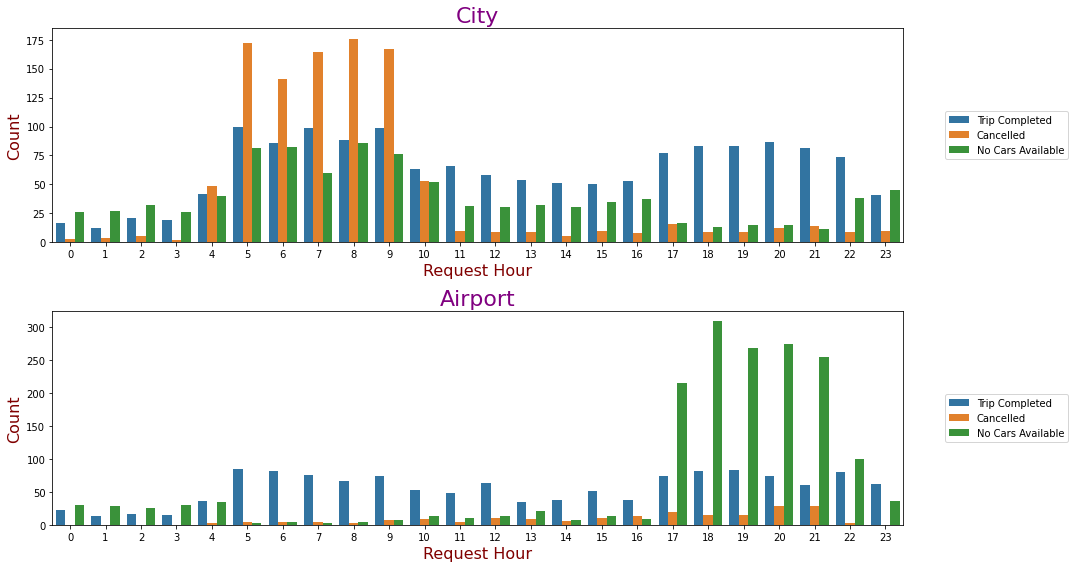

In [37]:
# Plotting data to get count of status for airport to city and city to airport trips
f = plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.countplot(data = uber_df_city, x = 'Request Hour', hue = 'Status')

# Setting title
plt.title("City", fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Request Hour', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

# Setting legend
plt.legend(bbox_to_anchor = (1.20, 0.5), loc = 'right')

plt.subplot(2,1,2)
sns.countplot(data = uber_df_airport, x = 'Request Hour', hue = 'Status')

# Setting title
plt.title("Airport", fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Request Hour', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

# Setting legend
plt.legend(bbox_to_anchor = (1.20, 0.5), loc = 'right')

plt.tight_layout()

**`Inferences:`**  
- In City, demand is greater than supply during early morning and in mid morning (4am to 10am).
- In Airport, demand is higher than supply during evening and at night (5pm to 12am).

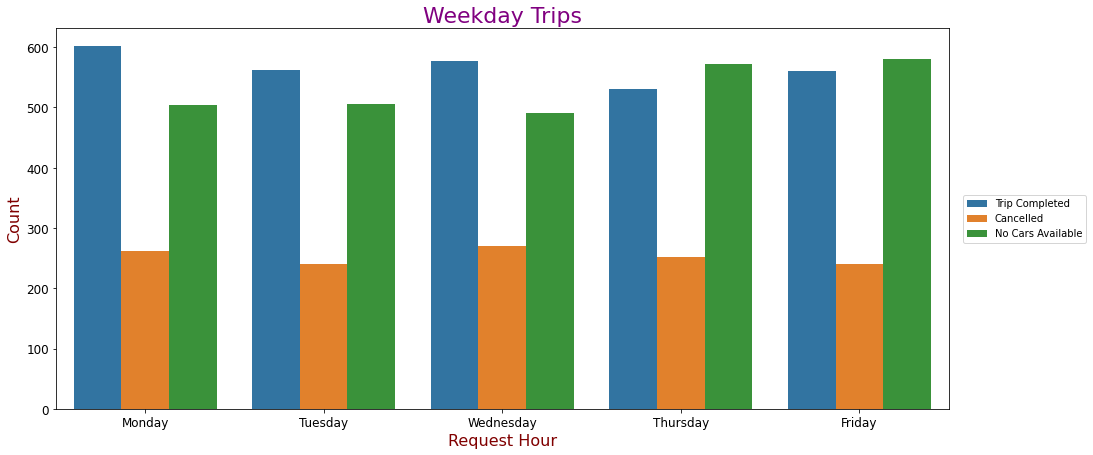

In [38]:
# Plotting data to show status count for each day
fig, ax = plt.subplots(figsize = (16,7))
sns.countplot(data = uber_df, x = 'Request Weekdays', hue = 'Status')

# Setting title
plt.title('Weekday Trips', fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Request Hour', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

# Setting x & y ticks
plt.xticks(fontsize = 12, fontweight = 5, color = 'Black')
plt.yticks(fontsize = 12, fontweight = 5, color = 'Black')

# Setting legend
plt.legend(bbox_to_anchor = (1.16, 0.5), loc = 'right')

plt.show()

**`Inferences:`**
- From the above graph we can see that:
1. Number of trips completed is higher on Monday and least on Thursday.
2. Number of trips cancelled is higher on Wednesday.
3. Number of no cars availability is higher on Thursday and Friday and slightly lower on other days.

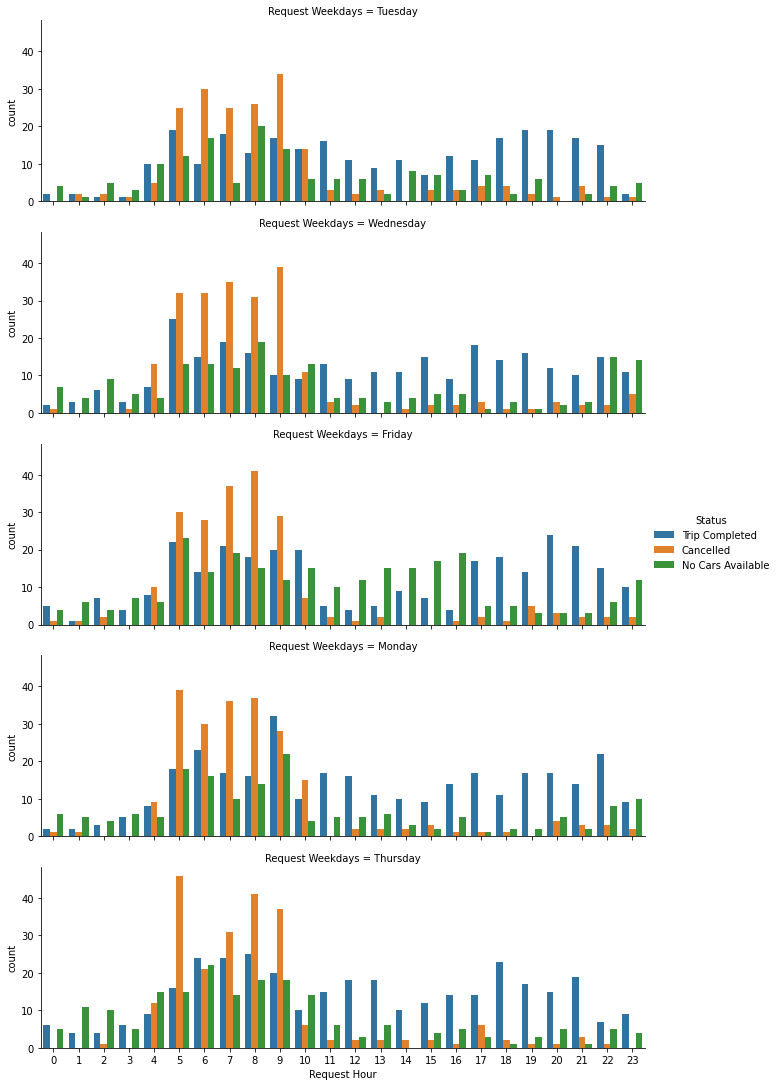

In [39]:
# Plotting factorplot to visualize the spread of count of trips broken down by status of trip and each day of week separately
# For pickup point City

sns.factorplot(data = uber_df[(uber_df['Pickup point']=="City")&(uber_df['Status'])], x = "Request Hour", hue = "Status", 
               row = "Request Weekdays",  kind = "count", size = 3, aspect = 3)
plt.show()

**`Inferences:`**
- The cancelled trips has higher bars then other trips status by which we can observe that in city demand is greater than supply during early morning and mid morning (4am to 10am) throughout all days of week. 

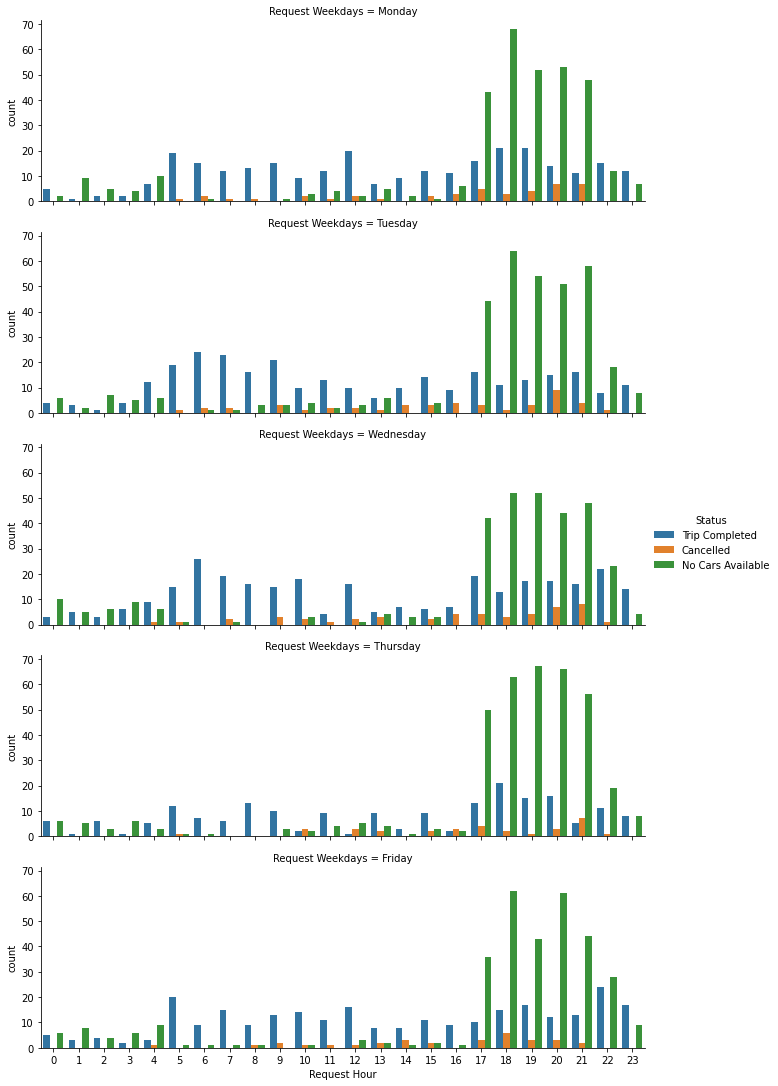

In [40]:
# Plotting factorplot to visualize the spread of count of trips broken down by status of trip and each day of week separately
# For pickup point Airport

sns.factorplot(data = uber_df[(uber_df['Pickup point']=="Airport")&(uber_df['Status'])], x = "Request Hour", hue = "Status", 
               row = "Request Weekdays",  kind = "count", size = 3, aspect = 3)
plt.show()

**`Inferences:`**
- The 'No cars available' status has higher bars then other trips status by which we can observe that in airport also demand is higher than supply during evening and night (5pm to 12am) throughout all days of week.

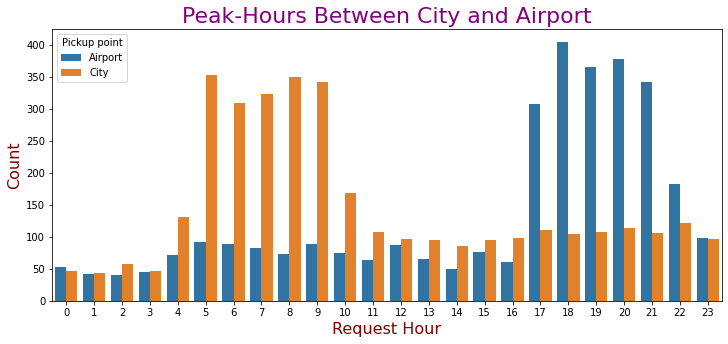

In [41]:
# Plotting hourly data to visualize peakhours from city to airport and airport to city trip

plt.subplots(figsize = (12,5))
sns.countplot(data = uber_df, x = 'Request Hour', hue = 'Pickup point')

# Setting title
plt.title("Peak-Hours Between City and Airport", fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Request Hour', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

plt.show()

**`Inferences:`**
- For the trips from City to Airport between 05:00-10:10 in the morning demand is higher while demand for the trips from Airport to City between 17:00-22:00 at night is higher.

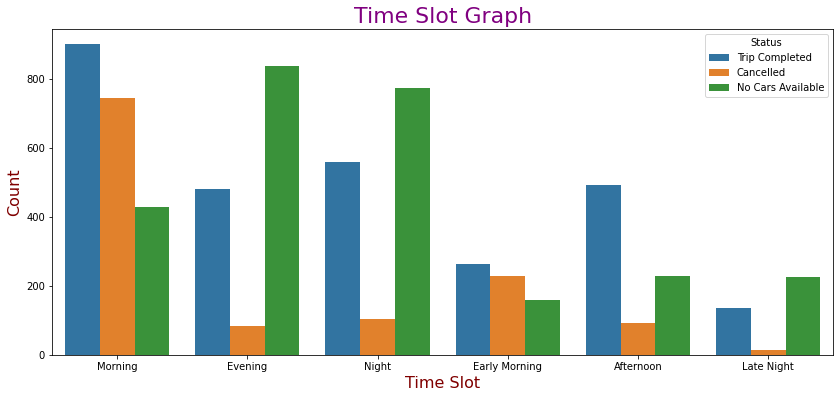

In [42]:
# Plotting data for different time slot

plt.figure(figsize=(14,6))
sns.countplot(data = uber_df, x = "Time Slot", hue = "Status")

# Setting title
plt.title('Time Slot Graph', fontsize = 22, fontweight = 8, color = 'Purple')

# Setting lable for x axis and y axis
plt.xlabel('Time Slot', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})
plt.ylabel('Count', fontdict = {'fontsize' : 16, 'fontweight' : 8, 'color' : 'Maroon'})

plt.show()

**`Inferences:`**
- As we can see there is more rush in morning and evening slot as comparison to other time slots. 
- And we can also observe that there is high demand in evening and at night and Uber is not able to meet up the demand as the no cars availability bar is higher in both slots which shows there is lack of supply.

In [43]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Drop Date,Drop Time,Request Weekdays,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,Tuesday,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,Wednesday,Morning


## Creating dummy values

In [44]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [45]:
uber_df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [46]:
lc.fit_transform(['Trip Completed', 'No Cars Avaliable', 'Cancelled'])
uber_df['Status'] = uber_df['Status'].map({'Trip Completed':0,
                                           'No Cars Available':1,
                                           'Cancelled':2})

In [47]:
uber_df['Request Weekdays'].value_counts()

Friday       1381
Monday       1367
Thursday     1353
Wednesday    1337
Tuesday      1307
Name: Request Weekdays, dtype: int64

In [48]:
lc.fit_transform(['Friday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday'])
uber_df['Request Weekdays'] = uber_df['Request Weekdays'].map({'Monday':0,
                                                              'Tuesday':1,
                                                              'Wednesday':2,
                                                              'Thursday':3,
                                                              'Friday':4})

In [49]:
uber_df['Time Slot'].value_counts()

Morning          2072
Night            1439
Evening          1401
Afternoon         810
Early Morning     648
Late Night        375
Name: Time Slot, dtype: int64

In [50]:
lc.fit_transform(['Morning', 'Night', 'Evening', 'Afternoon', 'Early Morning', 'Late Night'])
uber_df['Time Slot'] = uber_df['Time Slot'].map({'Early Morning':0,
                                                              'Morning':1,
                                                              'Afternoon':2,
                                                              'Evening':3,
                                                              'Night':4,
                                                              'Late Night':5})

In [51]:
uber_df['Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [52]:
clustering_data = uber_df[['Pickup point', 'Status', 'Request Weekdays', 'Time Slot']]
clustering_data

,Pickup point,Status,Request Weekdays,Time Slot
0,Airport,0,0,1
1,Airport,0,0,3
2,City,0,1,1
3,Airport,0,1,4
4,City,0,2,1
...,...,...,...,...
6740,City,1,4,4
6741,Airport,1,4,4
6742,City,1,4,4
6743,City,1,4,4


In [53]:
clustering_data.iloc[:,1:].describe()

,Status,Request Weekdays,Time Slot
count,6745.000000,6745.000000,6745.000000
mean,0.767680,2.010971,2.301853
std,0.743791,1.422743,1.470419
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000
75%,1.000000,3.000000,4.000000
max,2.000000,4.000000,5.000000


**`Inferences:`**
- Clustering algorithms doesn't work with categorical values so it is mandatory to create their dummy values.
1. Dummy values of **'Status'** -> Trip Completed : 0, No Cars Available : 1, Cancelled : 2
2. Dummy values of **'Reuqest Weekdays'** -> Monday : 0, Tuesday : 1, Wednesday : 2, Thursday : 3, Friday : 4
3. Dummy values of **'Time Slot'** -> Early Morning : 0, Morning : 1, Afternoon : 2, Evening : 3, Night : 4, Late Night : 5

## Scaling down the columns to same scale

In [54]:
clustering_data_to_be_scaled = clustering_data[['Status', 'Request Weekdays', 'Time Slot']]

# instantiate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
cluster_scaled = scaler.fit_transform(clustering_data_to_be_scaled)
cluster_scaled.shape

(6745, 3)

In [55]:
cluster_scaled = pd.DataFrame(cluster_scaled)
cluster_scaled.columns = ['Status', 'Request Weekdays', 'Time Slot']
# cluster_scaled
cluster_scaled.describe()

,Status,Request Weekdays,Time Slot
count,6.745000e+03,6.745000e+03,6.745000e+03
mean,-3.329550e-14,-5.157821e-15,-7.353775e-15
std,1.000074e+00,1.000074e+00,1.000074e+00
min,-1.032193e+00,-1.413551e+00,-1.565556e+00
25%,-1.032193e+00,-7.106316e-01,-8.854275e-01
50%,3.123691e-01,-7.711796e-03,-2.052990e-01
75%,3.123691e-01,6.952080e-01,1.154958e+00
max,1.656932e+00,1.398128e+00,1.835086e+00


**`Inferences:`**
- As every dummy value created wasn't on the scale which could lead irrelevant clusters.
- Every variable is scaled down and lies between -1 and +1.

## K-Means Clustering

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Elbow-curve

In [57]:
k_vals = np.arange(3,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(cluster_scaled)
  wss.append([i,kmodel.inertia_])

print(wss)

[[3, 10897.01917233846], [4, 8165.09947259813], [5, 6715.427356392936], [6, 5686.5567283306955], [7, 4811.879852045109], [8, 4128.716638452884], [9, 3735.2406672124625], [10, 3322.2441349858595], [11, 2994.3462351742705], [12, 2800.7549594846614], [13, 2642.0409780402492], [14, 2458.1116011281542]]


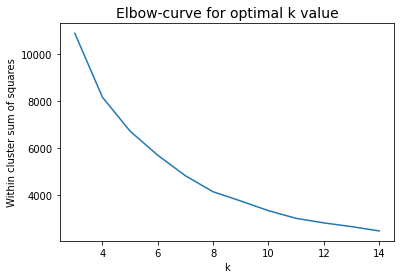

In [58]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

**`Inferences:`**
- As the Elbow-curve is coming out to be smooth and making it difficult to come up with the an optimal numnber of clusters.
- But when analyised closely, we can consider 5 clusters to be optimal for the our K-Means model.
- For better clarification lets consider Silhouette Analysis too.

### Silhouette Analysis

In [59]:
# silhouette analysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_vals_new = np.arange(3,15)
for num_clusters in k_vals_new: 
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_scaled)
    
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=3, the silhouette score is 0.32659150403378706
For n_clusters=4, the silhouette score is 0.3379859613441783
For n_clusters=5, the silhouette score is 0.34653699707280783
For n_clusters=6, the silhouette score is 0.37493495216082573
For n_clusters=7, the silhouette score is 0.3808224669568404
For n_clusters=8, the silhouette score is 0.38919678832137117
For n_clusters=9, the silhouette score is 0.41421878348963087
For n_clusters=10, the silhouette score is 0.4088027113455968
For n_clusters=11, the silhouette score is 0.4255280435867989
For n_clusters=12, the silhouette score is 0.42127621467398674
For n_clusters=13, the silhouette score is 0.42859713842263036
For n_clusters=14, the silhouette score is 0.4354170727358296


**`Inferences:`**
- As we can see, the silhouette value of 5 clusters is about 0.346. But Silhouette analysis says higher the value of the cluster, better is the model performance and is the optimal number of cluster.
- From Silhouetter analysis, 14 clusters gives us the highest score but in real world it is very difficult to analysis 14 clusters over a dataset having 6000+ data points.
- So from Elbow-cruve and Silhouette analysis we have 5 clusters for model building.

In [60]:
kmodel_new = KMeans(n_clusters = 5, max_iter = 100)

kmodel_new.fit(cluster_scaled)
pred_labels = kmodel_new.predict(cluster_scaled)

In [61]:
pred_labels

array([4, 2, 4, ..., 1, 1, 1])

In [62]:
clustering_data['cluster'] = pred_labels
clustering_data.reset_index(drop = True, inplace = True)
clustering_data

,Pickup point,Status,Request Weekdays,Time Slot,cluster
0,Airport,0,0,1,4
1,Airport,0,0,3,2
2,City,0,1,1,4
3,Airport,0,1,4,2
4,City,0,2,1,4
...,...,...,...,...,...
6740,City,1,4,4,1
6741,Airport,1,4,4,1
6742,City,1,4,4,1
6743,City,1,4,4,1


In [63]:
clustering_data['cluster'].value_counts()

2    1859
4    1478
1    1427
3    1111
0     870
Name: cluster, dtype: int64

In [64]:
airport =  clustering_data[clustering_data['Pickup point'] == 'Airport']
airport.groupby('cluster').count()

,Pickup point,Status,Request Weekdays,Time Slot
cluster,,,,
0,262,262,262,262
1,933,933,933,933
2,1328,1328,1328,1328
3,114,114,114,114
4,601,601,601,601


In [65]:
city =  clustering_data[clustering_data['Pickup point'] == 'City']
city.groupby('cluster').count()

,Pickup point,Status,Request Weekdays,Time Slot
cluster,,,,
0,608,608,608,608
1,494,494,494,494
2,531,531,531,531
3,997,997,997,997
4,877,877,877,877


In [76]:
clustering_data.groupby(['cluster', 'Status']).count()

Pickup point  Request Weekdays  Time Slot
cluster Status                                           
0       0                606               606        606
        1                264               264        264
1       0                485               485        485
        1                887               887        887
        2                 55                55         55
2       0                692               692        692
        1               1069              1069       1069
        2                 98                98         98
3       2               1111              1111       1111
4       0               1048              1048       1048
        1                430               430        430

In [77]:
clustering_data.groupby(['cluster', 'Request Weekdays']).count()

Pickup point  Status  Time Slot
cluster Request Weekdays                                 
0       3                          439     439        439
        4                          431     431        431
1       3                          679     679        679
        4                          748     748        748
2       0                          635     635        635
        1                          590     590        590
        2                          634     634        634
3       0                          220     220        220
        1                          214     214        214
        2                          240     240        240
        3                          235     235        235
        4                          202     202        202
4       0                          512     512        512
        1                          503     503        503
        2                          463     463        463

In [75]:
clustering_data.groupby(['cluster', 'Time Slot']).count()

Pickup point  Status  Request Weekdays
cluster Time Slot                                        
0       0                   168     168               168
        1                   525     525               525
        2                   177     177               177
1       2                   120     120               120
        3                   555     555               555
        4                   586     586               586
        5                   166     166               166
2       3                   797     797               797
        4                   853     853               853
        5                   209     209               209
3       0                   227     227               227
        1                   744     744               744
        2                    91      91                91
        3                    49      49                49
4       0                   253     253               253
        1                   803     803               803
        2                   422     422               422

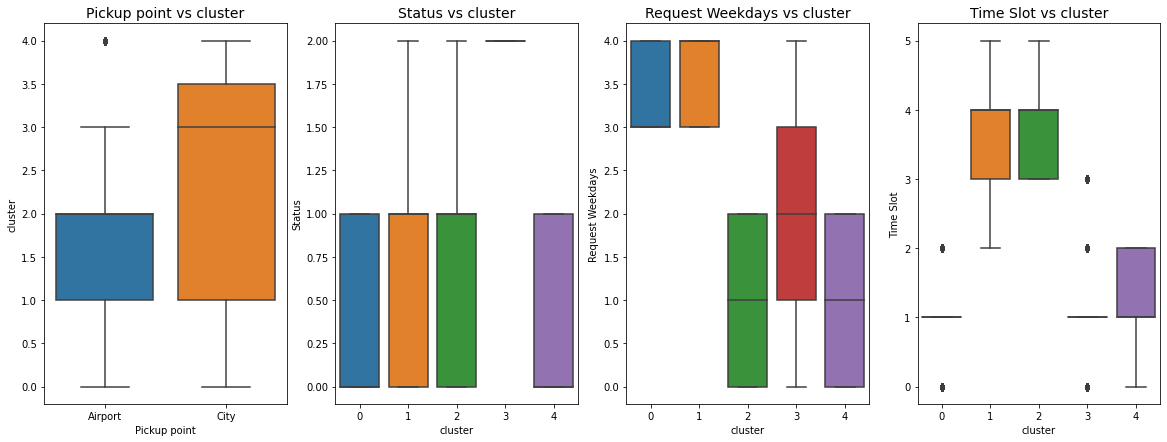

In [73]:
fig, ax = plt.subplots(1, 4, figsize = (20,7))

plt.subplot(1,4,1)
sns.boxplot(y = 'cluster', x = 'Pickup point', data = clustering_data)
plt.title('Pickup point vs cluster', fontsize = 14)

plt.subplot(1,4,2)
sns.boxplot(x = 'cluster', y = 'Status', data = clustering_data)
plt.title('Status vs cluster', fontsize = 14)

plt.subplot(1,4,3)
sns.boxplot(x = 'cluster', y = 'Request Weekdays', data = clustering_data)
plt.title('Request Weekdays vs cluster', fontsize = 14)

plt.subplot(1,4,4)
sns.boxplot(x = 'cluster', y = 'Time Slot', data = clustering_data)
plt.title('Time Slot vs cluster', fontsize = 14)
plt.show()

**`Inferences:`**
- From the clusters we can interpret that most of the people book cabs in the city rather near the airport.
- As shown from the boxplot there are very few people who are frequently booking cabs from the airport. 14.6% of the people are the ones who are frequently booking cabs from the airports. 
- Time Slot vs cluster graph depicts the following:-
    1. From cluster 0, 19.3% and 20.3% cabs are more frequently booked in the Earling morning and Afternoon respectively.
    2. From cluster 3, 20.4%, 8.2% and 4.4% cabs are more frequently booked in the Earling morning, Afternoon and Evening respectively.
- The people who are frequently booking cabs near airport are the one either who are arriving or departing from the airport. The time during which the bookings are happening is either during evening or at night (5pm to 12am).
- The people who are booking Early Morning (4am to 6 am) are the ones who are tavelling to their work place. Also due to heavy bookings, their is shortage of cabs leading to high cancelling of trips by the drivers throughout all weekdays. During evening and night (5pm to 12am), same scenario repeats and in return no cabs are available .